In [9]:
import cv2 as cv
import numpy as np
from tensorflow.keras.datasets import mnist
from math import log10 , copysign
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

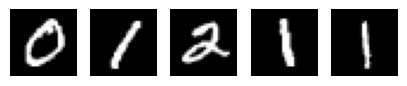

In [7]:
train_filter = np.isin(y_train, [0, 1, 2])
test_filter = np.isin(y_test, [0, 1, 2])

X_train = x_train[train_filter]
y_train = y_train[train_filter]
X_test = x_test[test_filter]
y_test = y_test[test_filter]

fig, axes = plt.subplots(1, 5, figsize=(5, 1))
for i in range(5):
    ax = axes[i]
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()



In [10]:
# Normalization
X_train = cv.normalize(X_train, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
X_test = cv.normalize(X_test, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)



In [11]:
def Find_HuMoments(images):
    hu_moments = []
    for image in images:
        _, BinImage = cv.threshold(image, 0.5, 1, cv.THRESH_BINARY_INV)
        BinImage = (BinImage * 255).astype(np.uint8)
        moments = cv.moments(BinImage)
        hu = cv.HuMoments(moments).flatten()
        hu_moments.append(hu)
    return np.array(hu_moments)

X_train_Hu = Find_HuMoments(X_train)
X_test_Hu = Find_HuMoments(X_test)
scaler = StandardScaler()
X_train_hu = scaler.fit_transform(X_train_Hu)
X_test_hu = scaler.transform(X_test_Hu)

In [12]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_hu, y_train)

SVC(kernel='linear')

In [13]:
y_pred = svm_model.predict(X_test_hu)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.3f}')

Test Accuracy: 0.910


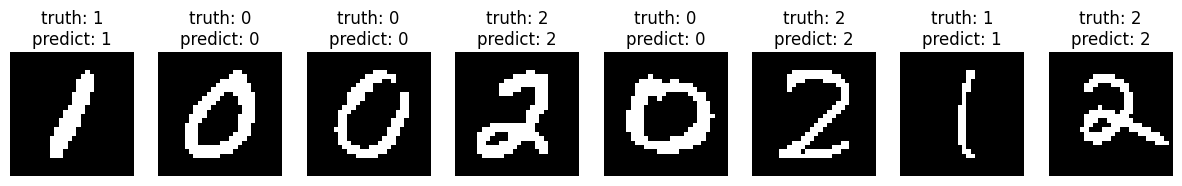

In [15]:
indx = np.random.choice(range(len(X_test_hu)), 8, replace=False)
plt.figure(figsize=(15, 15))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    image = X_test[indx][i]
    plt.imshow(image, cmap='gray')
    plt.title(f'truth: {y_test[indx][i]}\npredict: {y_pred[indx][i]}')
    plt.axis('off')
plt.show()